# NT Fake Driver’s License Detection

This project aims to detect tampering or forgery in Northern Territory (NT) driver’s licenses using computer vision techniques. It compares a user-submitted license with a genuine reference image to check for any visual alterations.

# Method
We use Structural Similarity Index (SSIM) to measure how similar two images are. A lower SSIM value indicates potential tampering.

**Steps**:
**1. Import Libraries**

In [17]:
#importing the necessary packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests
import numpy as np
import matplotlib.pyplot as plt

In [18]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

mkdir: cannot create directory ‘pan_card_tampering’: File exists
mkdir: cannot create directory ‘pan_card_tampering/image’: File exists


In [19]:
# Open Image and display
original = Image.open(requests.get('https://iili.io/3wV5ntt.png', stream=True).raw)
tampered = Image.open(requests.get('https://iili.io/3wVlIaa.png', stream=True).raw)

**2.   Download and Resize Images**

In [20]:
#The file format of the source file.
print("Original image format : ", original.format)
print("Tampered image format : ", tampered.format)

#Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Original image size : ", original.size)
print("Tampered image size : ", tampered.size)

Original image format :  PNG
Tampered image format :  PNG
Original image size :  (710, 453)
Tampered image size :  (876, 561)


In [21]:
#Resize Image
original = original.resize((250, 160))
print(original.size)
original.save('pan_card_tampering/image/original.png') #saving image
tampered = tampered.resize((250, 160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png') #saving image

(250, 160)
(250, 160)


Orginal Licencse image used for comparision

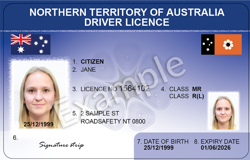

In [22]:
#Display original image
original

Image provided by user

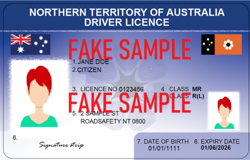

In [23]:
#Display user given image
tampered

Reading images using opencv

In [24]:
#load the two input images
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

**3**. **Convert to Grayscale and Compare**

Converting images into grayscale using opencv. As we know, for image processing, many application doesn't helps us to identify the important, edges of the colored images because of their complexity, it is hard for machines to understand. They have 3 channels (RGB) while grayscale has only 1 channel.

In [25]:
#convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

Structural similarity index is compared. This will help us to determine the image differences exactly in terms of x, y co-ordiantes location. Here, we are trying to find the similarity index between the tampered images and the original image. The lower the SSIM, lower is the similarity.

In [26]:
# compute the structural similarity index (SSIM) between the two images, ensuring the differences image is required
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.7185093644471188


**4. Highlight Differences**

Here we are using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in the form array. This function transforms the grayscale image into a binary image using a mathematical formula. Find contours works on binary image and retrive the contours. This contours are useful tool for a shape analysis and recognition. Grab contours grabs the appropriate value of the contours.

In [27]:
#calculating thresold and contours
thres = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

Bounding rectangle helps in finding the ratio of width to height to height of bounding rectangle of the object. We compute the bounding box of the countour and then draw the bounding box on both input images to represent where the two images are different or not.

In [28]:
#loop over the countours
for c in cnts:
    #computing the bounding box of the contour and then drawing the bounding box on both
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)


**5. Visualize Results**

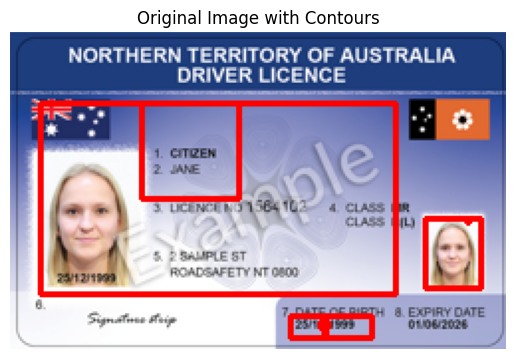

In [29]:
#Display the original image with contour
original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

# Display using matplotlib
plt.imshow(original_rgb)
plt.title("Original Image with Contours")
plt.axis('off')
plt.show()

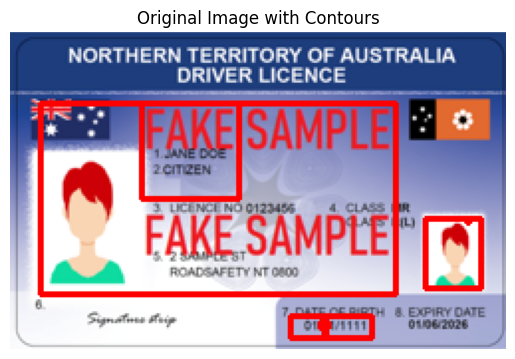

In [30]:
#Display the tampered image with contour
original_rgb = cv2.cvtColor(tampered, cv2.COLOR_BGR2RGB)

# Display using matplotlib
plt.imshow(original_rgb)
plt.title("Original Image with Contours")
plt.axis('off')
plt.show()

Difference between the images


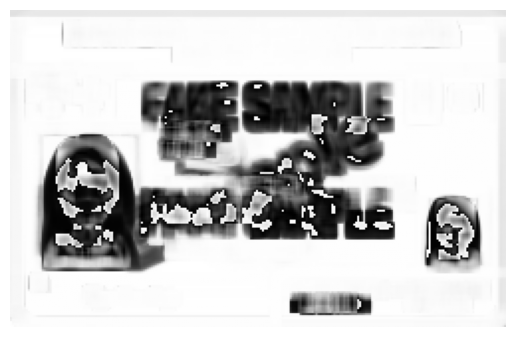

In [31]:
#Display difference image with black
print('Difference between the images')
plt.imshow(diff, cmap='gray')
plt.axis('off')
plt.show()

Threshold image


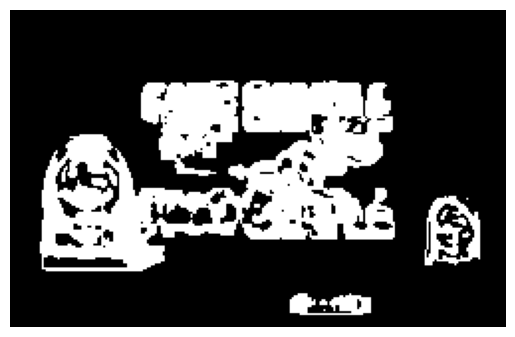

In [32]:
#Display threshold image with white
print('Threshold image')
plt.imshow(thres, cmap='gray')
plt.axis('off')
plt.show()

**5. Conclusion**

With an SSIM score of ~0.71, the system identifies the uploaded NT driver’s license as likely fake or tampered. This tool can assist government offices and organizations in automating ID verification and preventing fraud.

| **SSIM Score (%)** | **Similarity Level** | **Interpretation**                       |
| ------------------ | -------------------- | ---------------------------------------- |
| 90 – 100%          | Very High Similarity | Most likely **genuine** (untampered)     |
| 75 – 89%           | High Similarity      | Possibly genuine, minor changes detected |
| 50 – 74%           | Moderate Similarity  | **Suspicious**, possible tampering       |
| 30 – 49%           | Low Similarity       | Likely **tampered or fake**              |
| 0 – 29%            | Very Low Similarity  | Definitely **fake or highly altered**    |


# Scope
This project can be used in different organizations where customers or users need to provide an ID to get themselves verified.
